In [46]:
## ML-Q6 This is the Loan Eligibility Prediction 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("/content/sample_data/train_loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# filling the numerical cols with the mean values
df['LoanAmount']=df['LoanAmount'].fillna(df.LoanAmount.mean())
df['Credit_History']=df['Credit_History'].fillna(df.Credit_History.mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.mean())

In [11]:
#filling the categorical cols
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#checking duplicates
df.duplicated().sum()

0

In [15]:
# dropping unnecessary cols
df.drop(['Loan_ID'],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


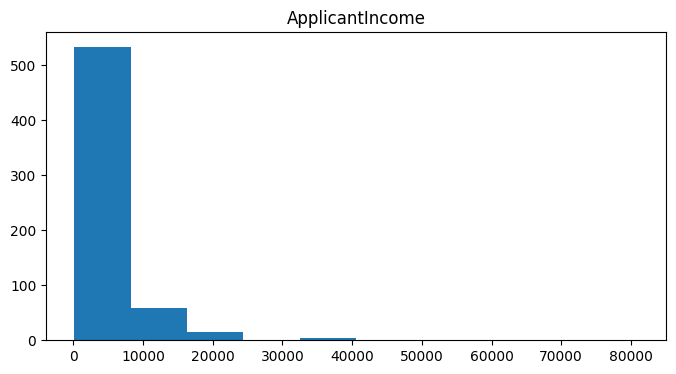

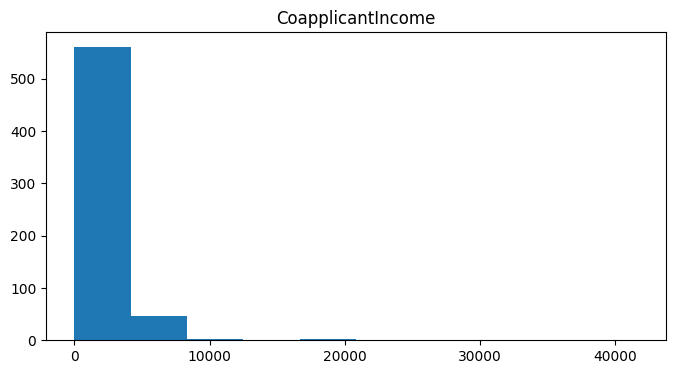

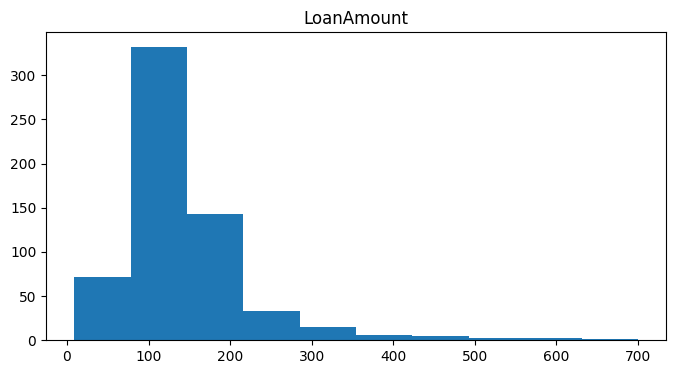

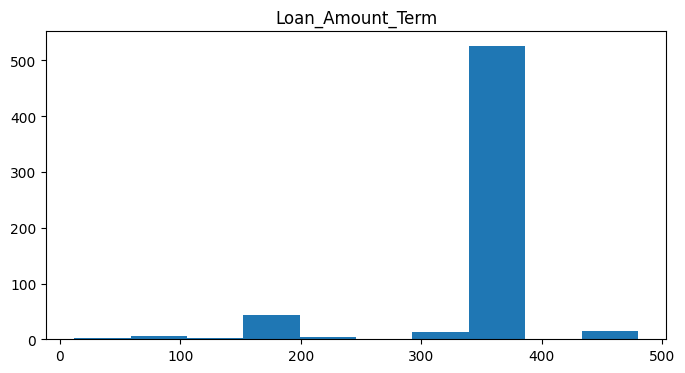

In [16]:
# Univariate analysis
num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for column in num:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

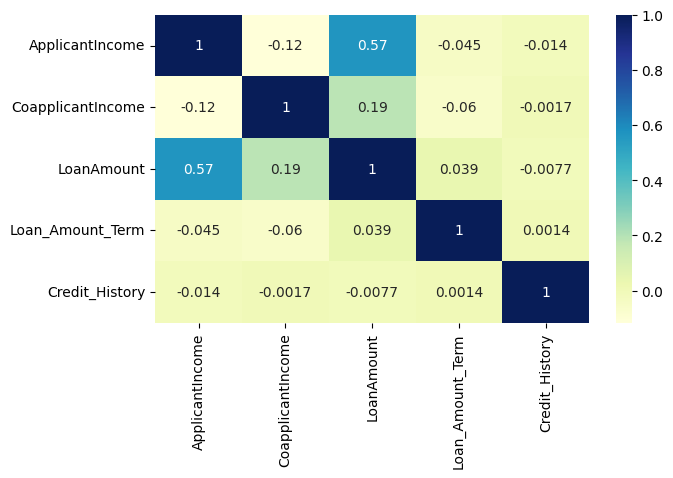

In [18]:
# checking the correlation
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu') 
plt.show()

In [19]:
# encoding the categorical variables
df.Loan_Status.replace('N',0,inplace=True)
df.Loan_Status.replace('Y',1,inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
df['Education']=LabelEncoder().fit_transform(df['Education'])
df['Dependents']=LabelEncoder().fit_transform(df['Dependents'])
df['Self_Employed']=LabelEncoder().fit_transform(df['Self_Employed'])
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df['Married']=LabelEncoder().fit_transform(df['Married'])
df['Property_Area']=LabelEncoder().fit_transform(df['Property_Area'])

In [21]:
df1=df.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [23]:
#dropping the categorical cols from the dataframe for analysis
catcols=['Loan_ID','Gender','Married','CoapplicantIncome','Loan_Amount_Term','Property_Area']
df1=df1.drop(columns=catcols,axis=1)
df1.head()


,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,0,0,5849,146.412162,1.0,1
1,1,0,0,4583,128.000000,1.0,0
2,0,0,1,3000,66.000000,1.0,1
3,0,1,0,2583,120.000000,1.0,1
4,0,0,0,6000,141.000000,1.0,1


In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import classification_report as cr
from sklearn.metrics import accuracy_score as ac

In [26]:
x=df1[['Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]
y=df1[['Loan_Status']]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [28]:
# First building a Decision Tree based model
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pre_dt = model.predict(x_test)
y_pre_dt

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [32]:
from sklearn.model_selection import cross_val_score
print(ac(y_test,y_pre_dt)*100)
score_d=(cross_val_score(model,x,y,cv=5))
print(np.mean(score_d)*100)

67.47967479674797
69.70145275223244


Text(0.5, 1.0, 'Confusion Matrix')

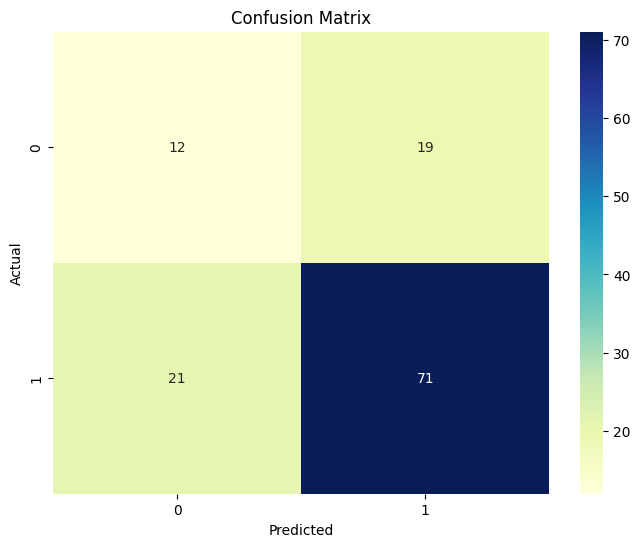

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pre_dt)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="YlGnBu")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")

In [34]:
test=[[1,0,0,4583.0,128.000000,1.0]]
op=model.predict(test)
op

array([0])

In [35]:
# With other algorithms
from sklearn.linear_model import LogisticRegression ,Lasso
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier

In [37]:
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)
rs = 10
clrs = []
clrs.append(LogisticRegression(random_state = rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(AdaBoostClassifier(random_state=rs))

In [38]:
cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, x_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

In [40]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["Logistic Regression","RandomForestClassifier","AdaBoostClassifier","Gradient Boosting"]})
cv_df

,CrossVal_Score_Means,CrossValerrors,Algo
0,0.779911,0.039815,Logistic Regression
1,0.769798,0.036391,RandomForestClassifier
2,0.761568,0.050055,AdaBoostClassifier
3,0.779944,0.029946,Gradient Boosting


In [41]:
# we can see all the algorithms are doing equally well, we can try to improve by hypertuning

In [43]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsGBC.fit(x_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_,gsGBC.best_params_

(0.7474550502379693,
 {'learning_rate': 0.1,
  'loss': 'deviance',
  'max_depth': 4,
  'max_features': 0.3,
  'min_samples_leaf': 100,
  'n_estimators': 200})

In [44]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

rf_param_grid = { 
    'max_features':['auto'], 'oob_score':[True], 'random_state':[1],
    "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5], "min_samples_split" : [ 4, 10 ], "n_estimators": [ 100, 400, 700]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_, gsRFC.best_params_

(0.7922065044949762,
 {'criterion': 'gini',
  'max_features': 'auto',
  'min_samples_leaf': 5,
  'min_samples_split': 4,
  'n_estimators': 700,
  'oob_score': True,
  'random_state': 1})

In [45]:
# Logistic regression Parameters tunning 
LRClr = LogisticRegression()


LR_param_grid = {'penalty':['l2','l1'],'C':[1,10,100],'random_state':[rs]}

gsLRClr=GridSearchCV(LRClr,param_grid = LR_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsLRClr.fit(x_train,y_train)

LRClr_best = gsLRClr.best_estimator_

# Best score
gsLRClr.best_score_, gsLRClr.best_params_

(0.7799444738233738, {'C': 100, 'penalty': 'l2', 'random_state': 10})

In [ ]:
# From the above results we can see that after hyper parameter tuning, RandomForestClassifier has the best performance